In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel("Multivariate_Regression_data.xlsx",sheet_name="Sheet1")
dataframe = pd.DataFrame(data)
df = dataframe.sample(frac=0.80)
data_size = len(df)
print(df)
X1 = df["X1"].to_numpy(float)
X2 = df["X2"].to_numpy(float)
Y = df["Y"].to_numpy(float)

          X1         X2           Y
81  1.627823   2.649809   19.338758
1   4.103744  16.840713   93.852058
63  4.681280  21.914384  114.598245
31  0.382117   0.146013    4.126722
55  4.203544  17.669782   97.897552
..       ...        ...         ...
99  4.734944  22.419691  120.760585
14  2.339744   5.474402   33.260886
15  3.811867  14.530330   82.452292
91  4.310749  18.582555  100.610074
37  2.516297   6.331753   39.858014

[96 rows x 3 columns]


In [3]:
#Making a copy of the excel file
#taking rondomly 80% data into the dataframe for testing
#Making numpy array X1, X2, Y to store testing data

Text(0, 0.5, 'Y')

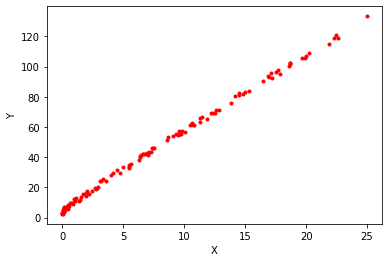

In [15]:
plt.plot(dataframe['X2'],dataframe['Y'],'.',color='Red')
plt.xlabel('X')
plt.ylabel('Y')

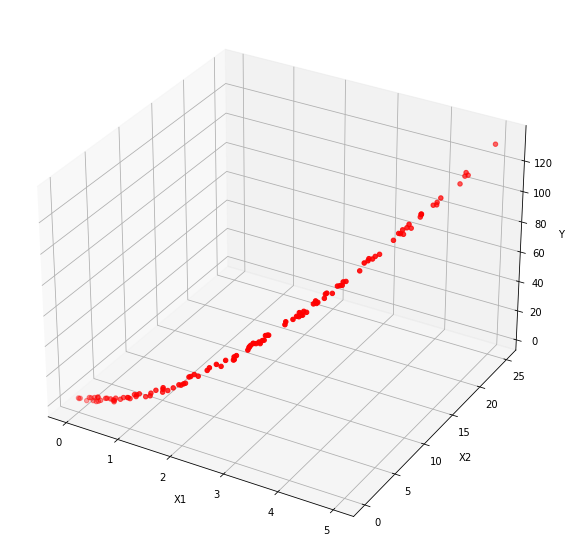

In [4]:
fig = plt.figure()
fig.set_size_inches(20,10,forward=True)
ax = fig.add_subplot(projection='3d')
ax.scatter3D(dataframe['X1'],dataframe['X2'],dataframe['Y'],color="Red")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
#plotting the graph for X1, X2, Y.

In [6]:
Ones = np.ones(data_size)
X1_training = X1[0:data_size]
X2_training = X2[0:data_size]
Y_training = Y[0:data_size]
Y_training = Y_training.reshape((data_size,1))
W = np.random.rand(3,1)
X = np.dstack((Ones,X1_training,X2_training))[0]

In [7]:
#Creating the Xn matrix
#Creating the random W array and managing the dimensions of matrix

In [8]:
Xtrans = np. transpose(X)
W = np.matmul(np.linalg.inv(np.matmul(Xtrans,X)),np.matmul(Xtrans,Y_training))
testing_data = dataframe.copy(deep=True)
testing_data = testing_data.drop(df.index)
print(np.shape(W[1]),np.shape(X),(testing_data['X1']))
testing_data['H(X1,X2)'] = W[0][0] + W[1][0]*testing_data['X1'] + W[2][0]*testing_data['X2']
print(testing_data)


(1,) (96, 3) 0      1.885940
2      0.911818
6      2.031454
7      0.594103
17     4.432554
18     3.272883
19     0.680023
21     1.217753
27     3.720025
28     0.045764
30     4.121714
33     3.875409
34     0.885063
38     2.647533
42     3.439314
43     3.917991
48     3.082482
50     4.320038
54     2.744933
56     0.422787
62     2.671885
77     0.870608
100    3.286362
117    0.651761
Name: X1, dtype: float64
           X1         X2           Y    H(X1,X2)
0    1.885940   3.556768   24.466473   25.165118
2    0.911818   0.831413    9.126872    9.854426
6    2.031454   4.126805   29.530602   28.193100
7    0.594103   0.352959    7.240982    6.727153
17   4.432554  19.647539  105.908766  105.962725
18   3.272883  10.711761   61.077362   61.855342
19   0.680023   0.462431    8.274295    7.482298
21   1.217753   1.482923   11.906503   13.733363
27   3.720025  13.838585   75.947839   77.413319
28   0.045764   0.002094    2.932952    3.489338
30   4.121714  16.988524   93.309561   

In [9]:
#Computing ((Xt*X)^-1)*(Xt*Y) to get Wd
#Testing remaining 20% data to get H(X1,X2)


In [10]:
E = 0
diff = testing_data['Y'] - testing_data['H(X1,X2)']
diff = diff ** 2
E = np.mean(diff)
print("Mean sqare Error : ",E)

Mean sqare Error :  1.0159323128689492


In [11]:
#Computing mean square from the testing data